# Guided Exercise Week 3: EDA, Visualization

## Data Exploration and Visualization with the Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data
iris = pd.read_csv('iris.csv', names= ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
iris.head() #to check the first 5 rows of the data set

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
all_species = pd.unique(iris.species) # find the unique names of species in the data
all_species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
iris.isnull().sum() #checks out how many null info are on the dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.describe() #to give a statistical summary about the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Pandas implements `matplotlib` to work with DataFrames and Series, natively.

[Visualization in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

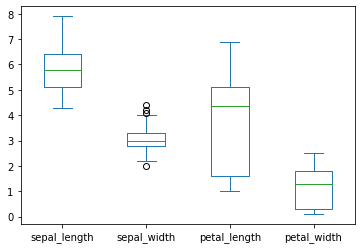

In [7]:
iris.plot(kind='box') # create a box plot of attributes for all species in the dataset
plt.show()

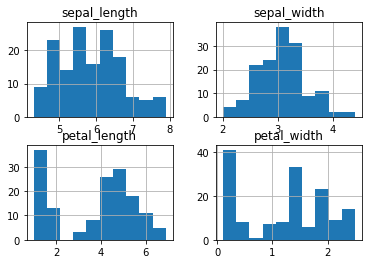

In [8]:
iris.hist() # visualize distribution of attributes in the whole dataset.  Note that petals seem to fall into groups.
plt.show()

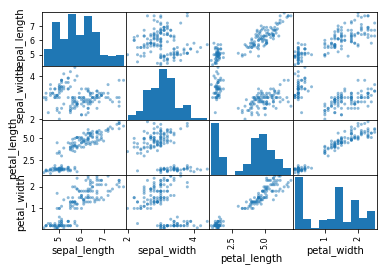

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris) # gives a visual feel for correlation
plt.show()

## Another visualization module you might want to consider is [Seaborn](https://seaborn.pydata.org/).  

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

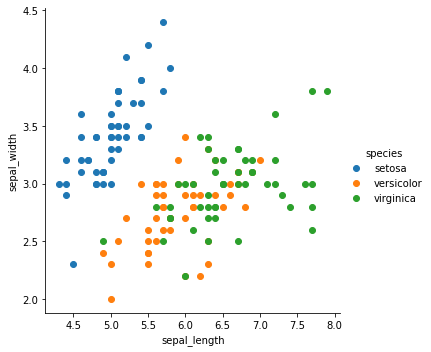

In [10]:
# We'll use seaborn's FacetGrid to color the scatterplot by species
# Note that the versicolor and virginca show a lot of overlap with these two features, but setosa stands out.
sns.FacetGrid(iris, hue="species", height=5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

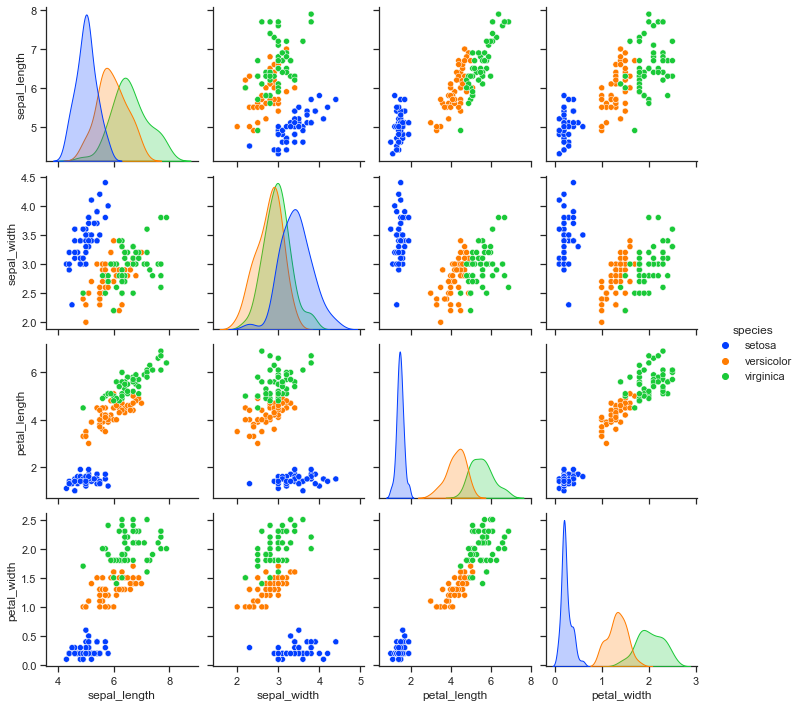

In [11]:
# The "Seaborn" plotting package provides some nicer visuals
sns.set(style="ticks")
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species",palette="bright")
plt.show()

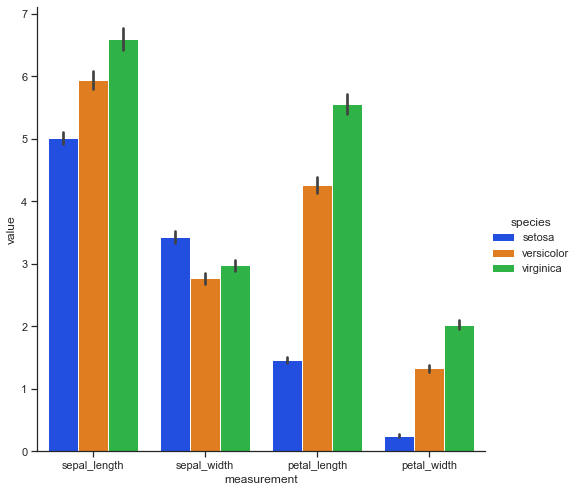

  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


In [12]:
piris = pd.melt(iris, "species", var_name="measurement") 
sns.catplot(x="measurement", y="value", hue="species", data=piris, height=7, kind="bar",palette="bright")
plt.show() 
print(piris.head())

We've looked at box plots of attributes, but now that we have decided that petal length and petal width are the most informative, let's revisit them with box and/or violin plots

<AxesSubplot:xlabel='species', ylabel='petal_width'>

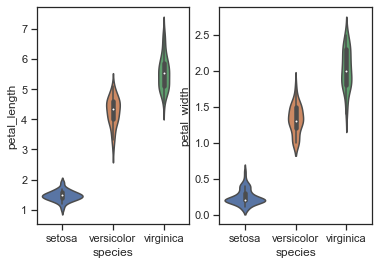

In [13]:
# We will plot length and width in two side by side subplots
# A violin plot is more informative than a box plot for this purpose
# Denser regions of the data are fatter, and sparser thiner in a violin plot

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
sns.violinplot(x="species", y="petal_length", data=iris, size=10)

ax2 = fig.add_subplot(1, 2, 2)
sns.violinplot(x="species", y="petal_width", data=iris, size=10)

<AxesSubplot:>

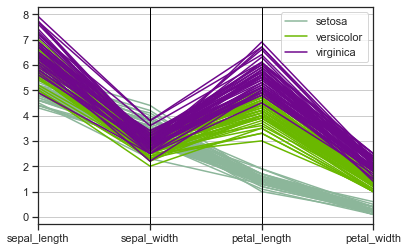

In [14]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample

from pandas.plotting import parallel_coordinates

# parallel_coordinates(iris.drop("Id", axis=1), "Species")
parallel_coordinates(iris, "species")

<AxesSubplot:>

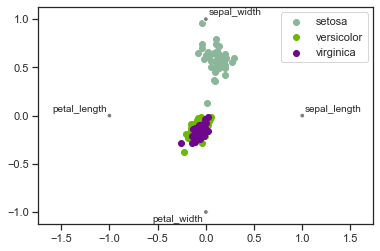

In [15]:
# the RadViz plot provides a radial depiction of the attributes
from pandas.plotting import radviz
radviz(iris, "species")